# Comparación de algoritmos de Series de Tiempo aplicados a diferentes tipos de conjuntos de datos

Objetivos del Laboratorio:
1. Familiarizar a los estudiantes con diferentes algoritmos de series de tiempo.
2. Comprender cuándo y cómo aplicar distintos algoritmos dependiendo de las
características de la serie de tiempo (tendencia, estacionalidad).
3. Evaluar el rendimiento de los algoritmos utilizando métricas de evaluación
apropiadas.
Herramientas Requeridas:
* Python (pandas, numpy, matplotlib, scikit-learn, statsmodels, Prophet, TensorFlow,
darts, etc.)
* Jupyter Notebook o Google Colab
* Conjuntos de datos proporcionados para el laboratorio

## Instrucciones:
* Conjunto de Datos 1: daily-total-female-births.csv
* Conjunto de Datos 2: shampoo.csv
* Conjunto de Datos 3: monthly-mean-temp.csv
* Conjunto de Datos 4: monthly-car-sales.csv

Para cada conjunto de datos, realizar lo siguiente:

1. Análisis Exploratorio:
• Describir la serie de tiempo y visualizarla.
2. Promedios:
• Aplicar métodos de promedios y comparar los resultados con el conjunto original.
3. SARIMA:
• Identificar parámetros y ajustar un modelo SARIMA.
4. Alisamiento Exponencial:
• Aplicar diferentes métodos de alisamiento exponencial y comparar.
5. Prophet:
• Utilizar Prophet para modelar la serie de tiempo.
6. Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo.
7. Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.
• Discutir cuál algoritmo se desempeña mejor para cada tipo de conjunto de datos y
por qué.

### Librerias necesarias para el Laboratorio 3

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Conjunto de Datos 1: daily-total-female-births.csv

### 1.) Análisis Exploratorio:
* Describir la serie de tiempo y visualizarla.


         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000


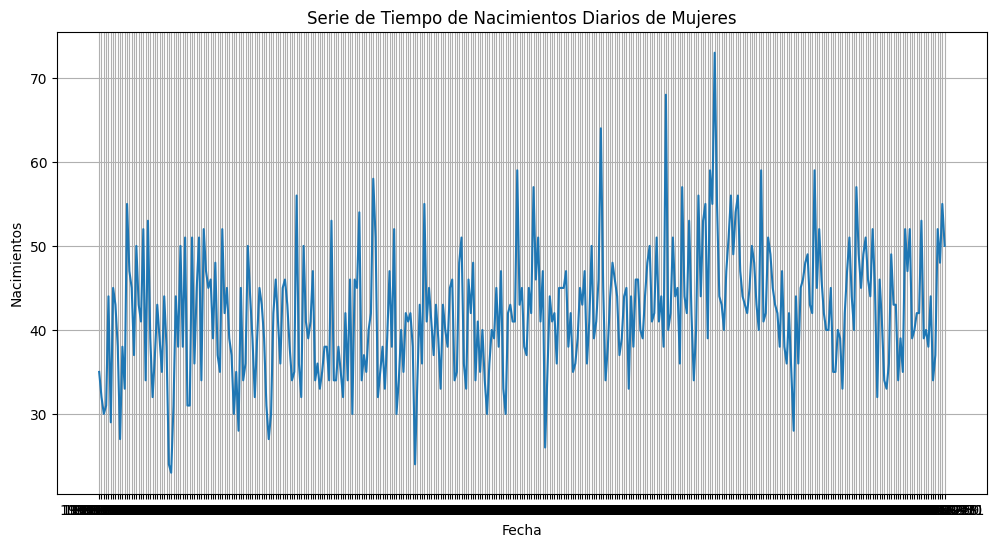

In [7]:
data = pd.read_csv("./Datos/daily-total-female-births.csv")

print(data.head())

print(data.describe())

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Births'])
plt.title('Serie de Tiempo de Nacimientos Diarios de Mujeres')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

### 2.) Promedios:
* Aplicar métodos de promedios y comparar los resultados con el conjunto original.

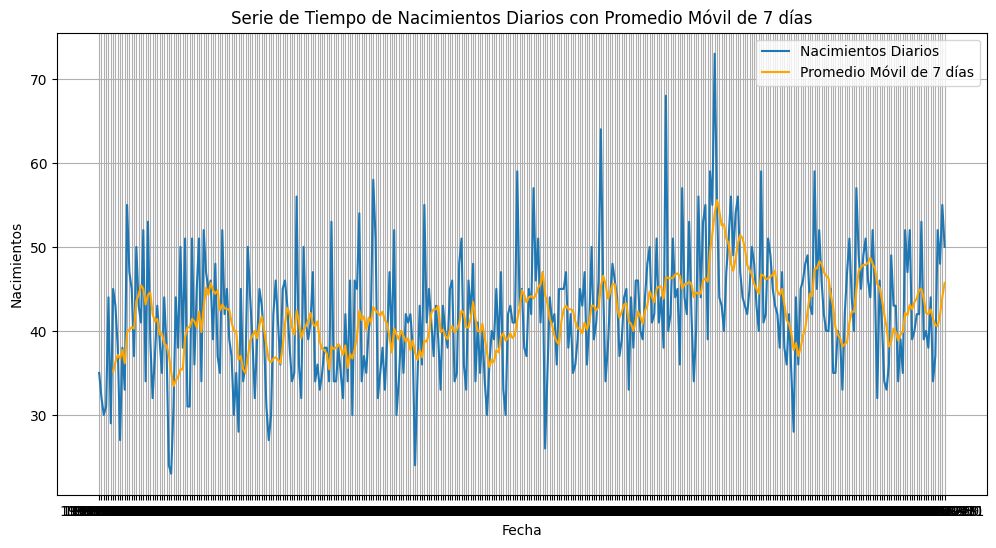

In [8]:
data['Moving_Average_7days'] = data['Births'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Births'], label='Nacimientos Diarios')
plt.plot(data['Date'], data['Moving_Average_7days'], label='Promedio Móvil de 7 días', color='orange')
plt.title('Serie de Tiempo de Nacimientos Diarios con Promedio Móvil de 7 días')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.show()


### 3.) SARIMA:
* Identificar parámetros y ajustar un modelo SARIMA.

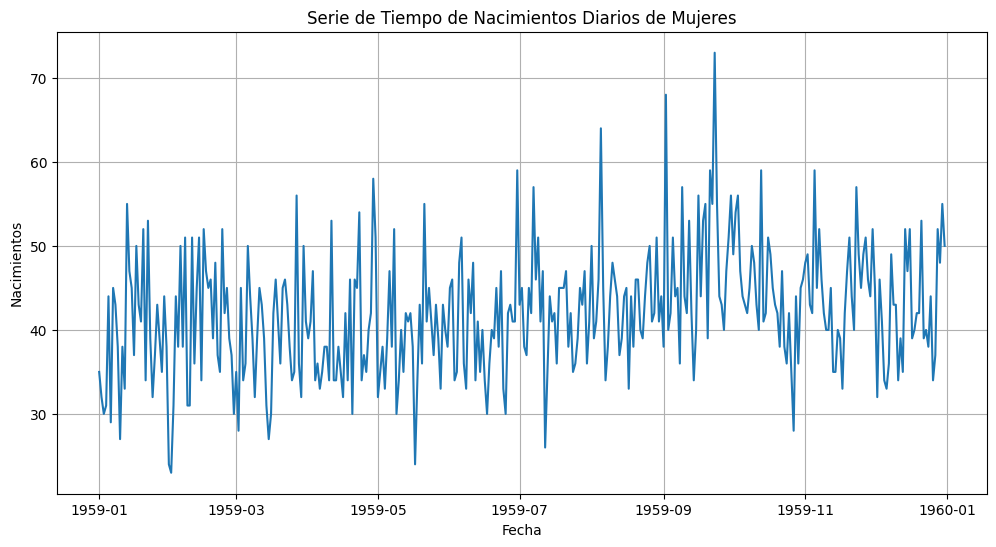

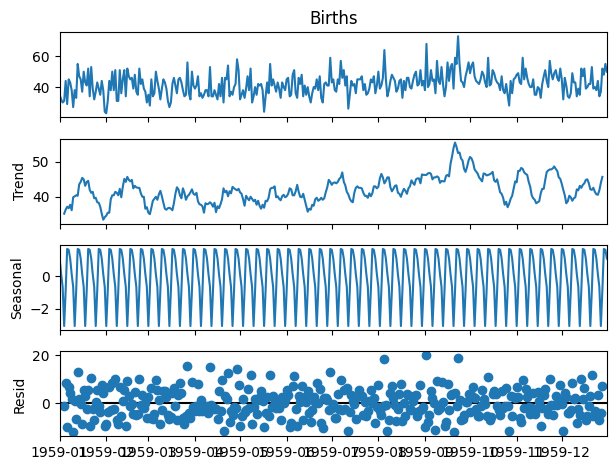

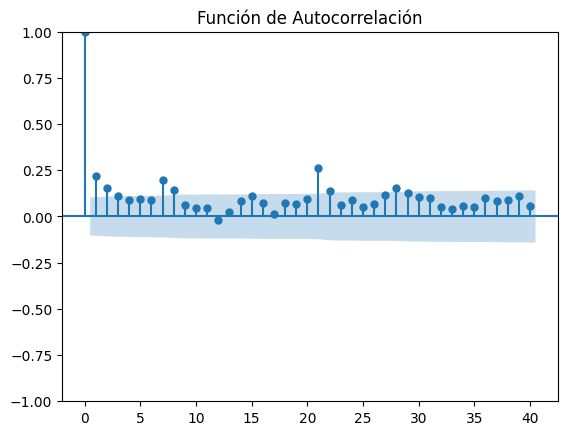

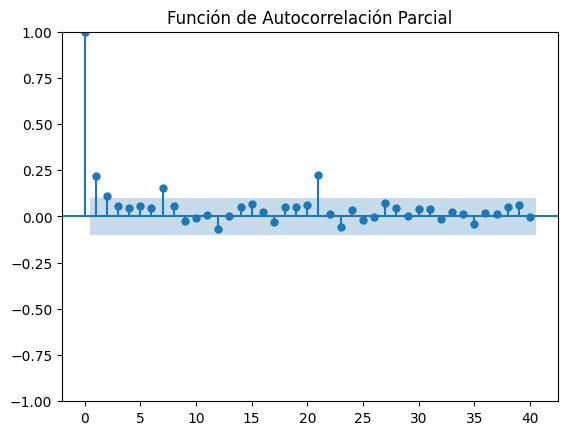

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv("./Datos/daily-total-female-births.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Births'])
plt.title('Serie de Tiempo de Nacimientos Diarios de Mujeres')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

result = seasonal_decompose(data['Births'], model='additive')
result.plot()
plt.show()

plot_acf(data['Births'], lags=40)
plt.title('Función de Autocorrelación')
plt.show()

plot_pacf(data['Births'], lags=40)
plt.title('Función de Autocorrelación Parcial')
plt.show()


In [10]:
sarima_model = sm.tsa.SARIMAX(data['Births'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 365))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


### 4.) Alisamiento Exponencial:
• Aplicar diferentes métodos de alisamiento exponencial y comparar.

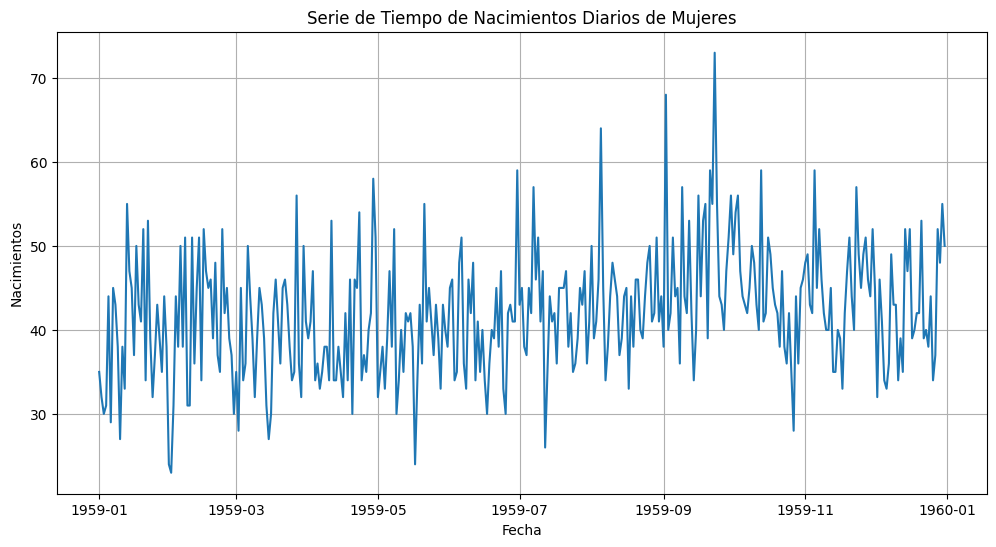

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Temp\ipykernel_1340\2448109169.py:15: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  exp_smoothing_double = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100, damped=True)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Temp\ipykernel_1340\2448109169.py:18: FutureWarning: the 'damped' keyword is deprecated, u

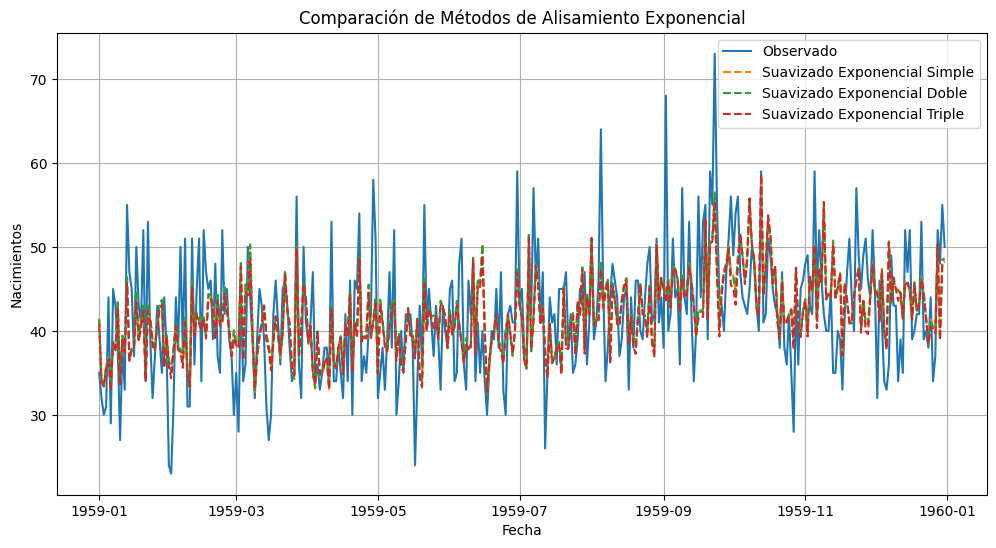

In [14]:

data = pd.read_csv("./Datos/daily-total-female-births.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['Births'])
plt.title('Serie de Tiempo de Nacimientos Diarios de Mujeres')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

exp_smoothing_simple = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100)
exp_smoothing_simple_fit = exp_smoothing_simple.fit()

exp_smoothing_double = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100, damped=True)
exp_smoothing_double_fit = exp_smoothing_double.fit()

exp_smoothing_triple = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100, damped=True, use_boxcox=True)
exp_smoothing_triple_fit = exp_smoothing_triple.fit()

plt.figure(figsize=(12, 6))
plt.plot(data['Births'], label='Observado')
plt.plot(exp_smoothing_simple_fit.fittedvalues, label='Suavizado Exponencial Simple', linestyle='--')
plt.plot(exp_smoothing_double_fit.fittedvalues, label='Suavizado Exponencial Doble', linestyle='--')
plt.plot(exp_smoothing_triple_fit.fittedvalues, label='Suavizado Exponencial Triple', linestyle='--')
plt.title('Comparación de Métodos de Alisamiento Exponencial')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.show()
